<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics with Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF)_

---

To review the general setup for Bayesian modeling, we have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Which is the "diachronic" interpretation of Bayes' formula.

Which can also be written as:

### $$posterior \propto likelihood \cdot prior$$

Where the posterior is an update of our prior belief, given the data observed.


---

### 1. Write functions to calculate the binomial likelihood and log likelihood

The binomial likelihood is defined as:

### $$likelihood(n,k\;|\;p) = \binom{n}{k}p^k(1-p)^{n-k}$$

Because the original can break easily with high counts, the log likelihood is often used in its place:

### $$log(likelihood) = log\binom{n}{k}+k \cdot log(p)+(n-k) \cdot log(1-p)$$

**Your functions should:**

1. Take a probability $p$, number of trials $n$, and number of successes $k$.
2. Return a likelihood for the trials and successes at that probability.

> **Hint:** Recall that `np.log()` can be used for natural log. `np.exp()` is useful for getting your likelihood out when the log-likelihood function is done computing. `scipy.misc.comb()` can get the combinations.

In [26]:
import numpy as np
from scipy.misc import comb

def bin_like(p, n, k):
    return comb(n, k) * p**k * (1 - p)**(n-k)

def bin_loglike(p, n, k):
    loglike = np.log(comb(n, k)) + k * np.log(p) + (n - k) * np.log(1 - p)
    return np.exp(loglike)

### 2. Calculate likelihoods using both functions for:

    n=10, k=3
    n=10, k=7
    n=20, k=15
    n=50, k=9
    n=70, k=50
    n=100, k=96
    
**For probabilities:**

    p = [0.05, 0.5, 0.95]

In [27]:
# A:
ns = [10, 10, 20, 50, 70, 100]
ks = [3, 7, 15, 9, 50, 96]
nks = zip(ns, ks) 

ps = [0.05, 0.5, 0.95]

for (n, k) in nks:
    print n, k
    for p in ps:
        print 'Probability: ', p, bin_like(p, n, k), bin_loglike(p, n, k)
        
    print '--------------'

10 3
Probability:  0.05 0.0104750594414 0.0104750594414
Probability:  0.5 0.1171875 0.1171875
Probability:  0.95 8.037890625e-08 8.037890625e-08
--------------
10 7
Probability:  0.05 8.037890625e-08 8.037890625e-08
Probability:  0.5 0.1171875 0.1171875
Probability:  0.95 0.0104750594414 0.0104750594414
--------------
20 15
Probability:  0.05 3.66110218964e-16 3.66110218964e-16
Probability:  0.5 0.0147857666016 0.0147857666016
Probability:  0.95 0.00224464601012 0.00224464601012
--------------
50 9
Probability:  0.05 0.000597421393598 0.000597421393598
Probability:  0.5 2.22527214433e-06 2.22527214433e-06
Probability:  0.95 7.18067945185e-45 7.18067945185e-45
--------------
70 50
Probability:  0.05 5.15439703965e-49 5.15439703965e-49
Probability:  0.5 0.000137121592955 0.000137121592955
Probability:  0.95 1.18791645303e-10 1.18791645303e-10
--------------
100 96
Probability:  0.05 4.03122093054e-119 4.03122093054e-119
Probability:  0.5 3.09330110308e-24 3.09330110308e-24
Probability:  

In [28]:
n = 100
p = 0.5
k = 500
bin_like(p, n, k) - bin_loglike(p, n, k)

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


0.0

## Review: the Beta distribution

---

[The Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is the appropriate prior distribution for modeling Bernoulli and/or Binomial processes (occurrences of successes or failures, etc.). It is a model of the random behavior of data related to percentages, rates, proportions, etc.

The Beta distribution takes two parameters: $Beta(\alpha,\beta)$

The $\alpha$ or **alpha** parameter can be thought of as the number of `successes + 1`

The $\beta$ or **beta** parameter can be thought of as the number of `failures + 1`

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" alt="betapdf" style="width: 400px;"/>

### 3. Plot Beta probability density functions

Use the `scipy.stats.beta` object to calculate the probability density of the beta function across a range of points.

Make one plot for each of the $n, k$ pairs you calculated the likelihood for above (converting them into success, failure pairs for the alpha, beta parameters). Plot the probability density function values across a range of probabilities between 0 and 1.

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.beta.html

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import beta

In [29]:
# A:
prob_range = np.linspace(0.01, 0.99, 99)
alpha_beta = [[k + 1, n - k +1] for n, k in nks]

In [31]:
def beta_plotter(pr, a, b):
    plt.figure(figsize = (4, 4))
    plt.plot(pr, beta.pdf(pr, a, b), lw = 2)
    plt.title(str(a) + ' alpha, ' + str(b) + ' beta', fontsize = 20)
    plt.xlabel('probability/batting average', fontsize = 16)
    plt.ylabel('probability density function (pdf)', fontsize = 16)
    
    plt.show()

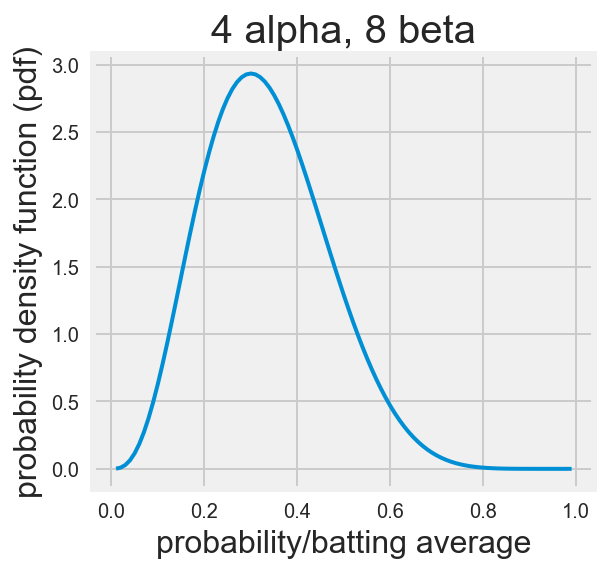

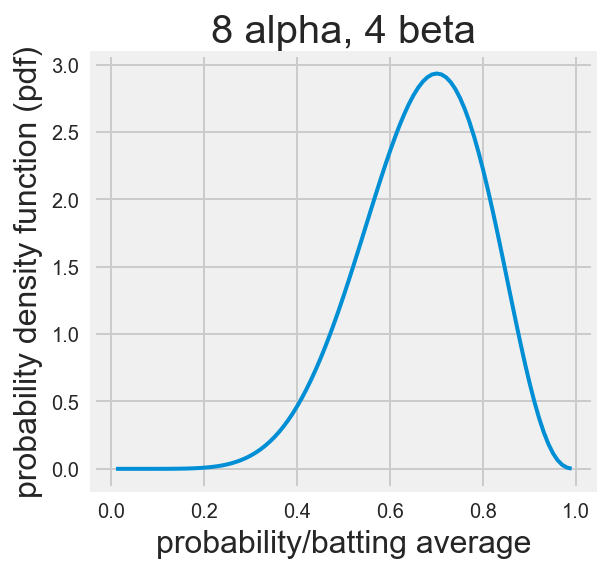

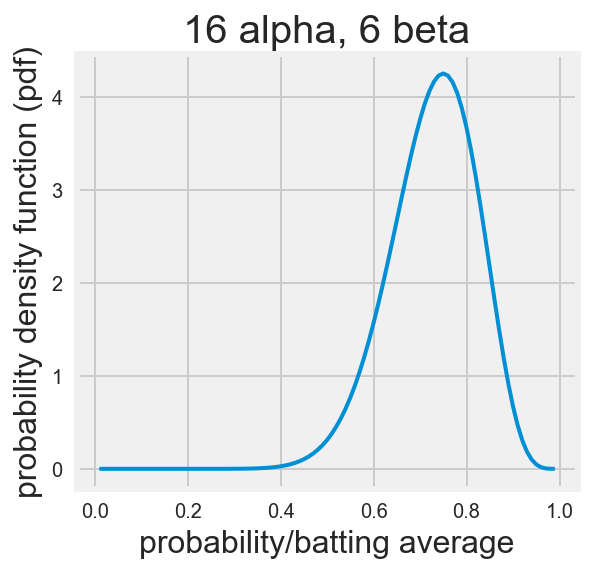

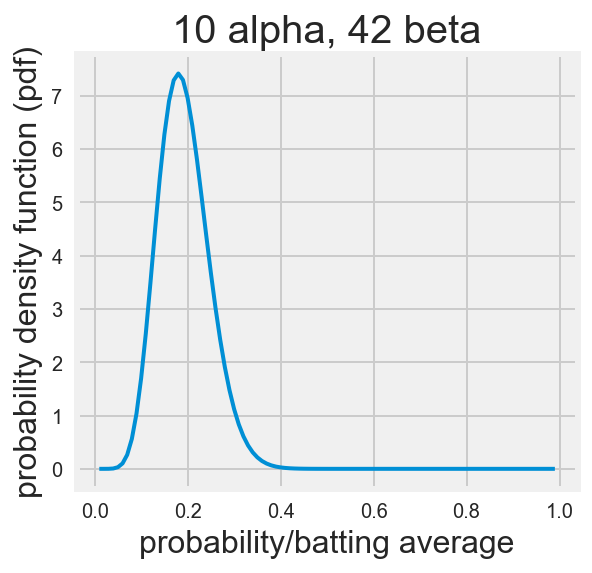

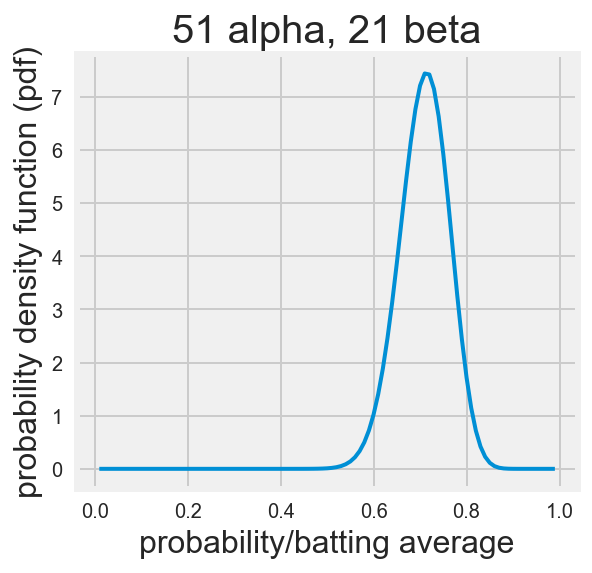

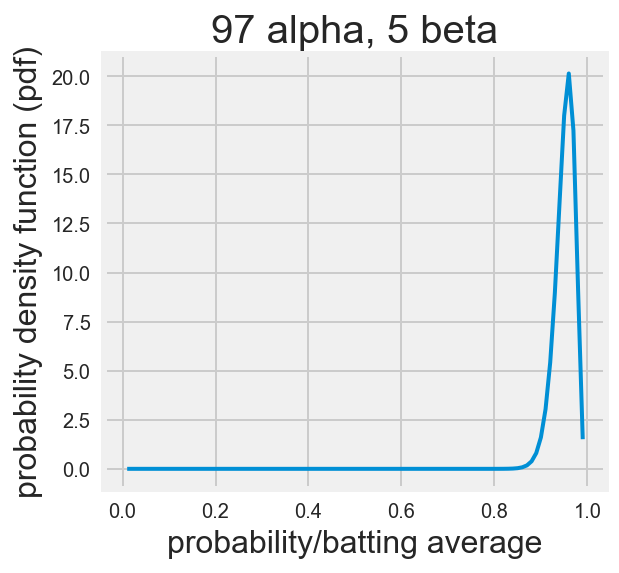

In [32]:
for a, b in alpha_beta:
    beta_plotter(prob_range, a, b)

In [ ]:
beta.pdf(0.100, 97, 5)

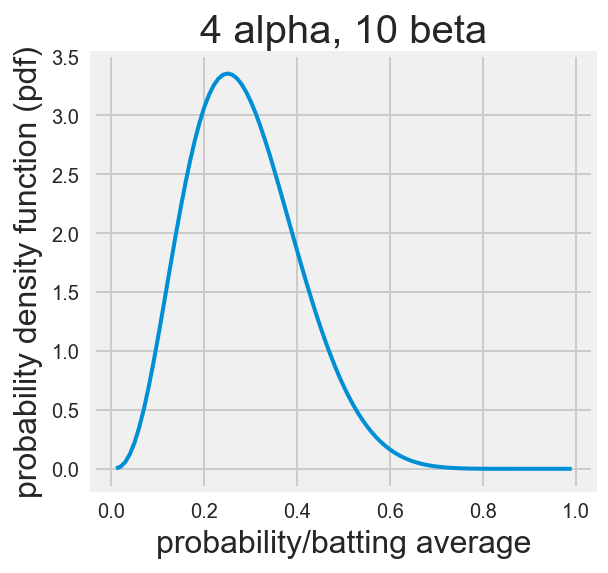

In [15]:
beta_plotter(prob_range, 4, 10)

0.18


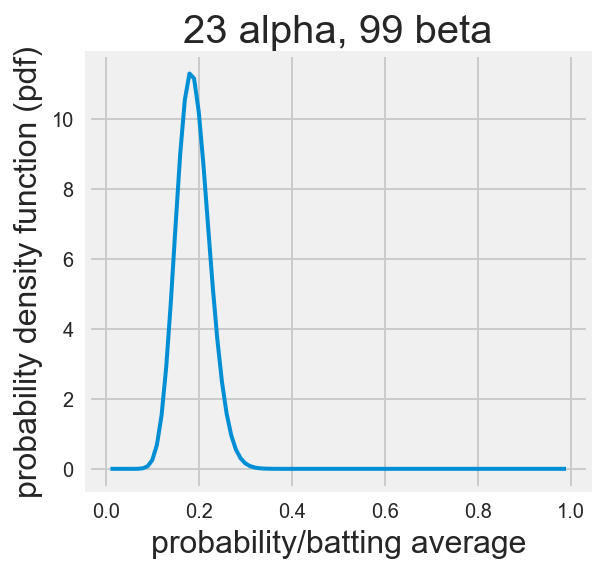

In [16]:
print prob_range[np.argmax(beta.pdf(prob_range, 23, 99))]
beta_plotter(prob_range, 23, 99)

## Review: the Beta as a "conjugate prior"

---

The beta distribution is a **conjugate prior** for the binomial (and the beta) distributions. What does this mean?

Take the calculation of the posterior distribution with a binomial likelihood function (any binary outcome data):

### $$\text{beta posterior} = \text{binomial likelihood} \cdot \text{beta prior}$$

**The Beta distribution being a "conjugate prior" of the Binomial likelihood guarantees that the posterior distribution will also be a Beta distribution.**

> **Note:** Conjugate priors are extremely useful for calculating posteriors directly. Unfortunately, in many modeling scenarios we do not have the convenience of a conjugate prior. This is where methods like Markov Chain Monte Carlo (MCMC) will come into play down the line.

## Bayesian analysis of batting averages

---

Load in the simple batting avergage data for players below. There are just four fields in the dataset: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested.](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/) But I took out the "empirical bayes" part because it's not technically a "correct" interpretation of Bayesian statistical analysis.*

In [18]:
hits = pd.read_csv('./datasets/career_hits.csv')

In [19]:
hits.head()

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614


### 4. Find the top and bottom 3 hitters according to their average.

What is wrong with using the average to find the 3 best and 3 worst hitters?

In [21]:
hits.sort_values('average', ascending = False).head(5)

,name,hits,at_bat,average
5853,John Mohardt,1,1,1.0
9303,Al Wright,1,1,1.0
359,Jeff Banister,1,1,1.0
5440,Sparrow McCaffrey,1,1,1.0
1126,C. B. Burns,1,1,1.0


In [22]:
hits.sort_values('average', ascending = True).head(5)

,name,hits,at_bat,average
1494,Larry Ciaffone,0,5,0.0
7303,Jay Rogers,0,8,0.0
2552,Ferd Eunick,0,2,0.0
3767,Tom Hess,0,2,0.0
2089,Artie Dede,0,1,0.0


### 5. Set up a prior distribution to represent our belief about batting average

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

**Let's make it simple and say that our prior belief is: out of 100 at-bats we have seen 26 hits. Set up a beta distribution with `alpha=27` and `beta=75`. Plot it with the function from above.**

This is our distribution of beliefs on the batting average (probability of hit while at-bat) for MLB players.

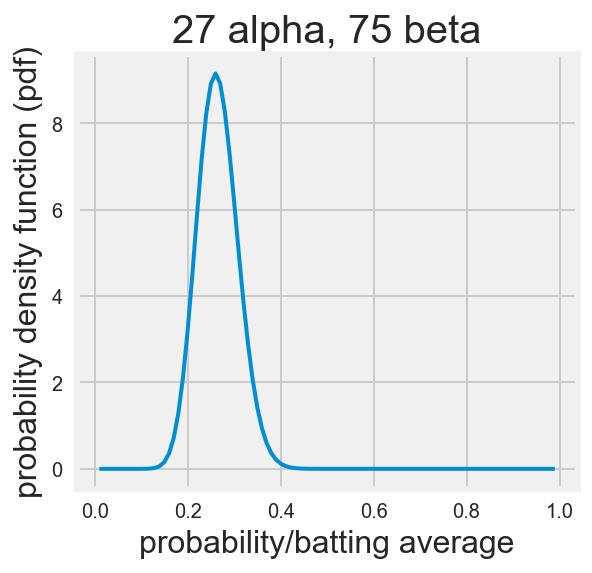

In [24]:
beta_plotter(prob_range, 27, 75)

### 6. Calculate the Maximum A Posteriori (MAP) estimate of players' batting averages

The Maximum A Posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the **mode of the posterior Beta distribution** we get from updating our prior distribution with their at-bats and hits.

---

> *Note: For an additional overview of the math behind updating the Beta distribution posterior and conjugate priors ([see this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution prior belief about batting averages with a player's at-bat and hit information to give us a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution the update is just a matter of adding in our new observations to the alpha and beta parameters of the distribution, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
> **Note:** This process will also be useful in the context of A/B testing, which we will look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined:

### $$ \text{Mode of BetaDist}(\alpha,\beta) = \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even really need to use scipy's beta distribution function at all. Just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting average.

In [33]:
# A:
prior_hits = 26
prior_misses = 74

In [34]:
hits['MAP'] = map(lambda k, n: float(k + prior_hits) / (n + prior_hits + prior_misses), 
                 hits.hits.values, hits.at_bat.values)

### 7. Look up the top and bottom batters according to the MAP estimate

In [36]:
# A:
hits.head()

,name,hits,at_bat,average,MAP
0,Hank Aaron,3771,12364,0.304998,0.304637
1,Tommie Aaron,216,944,0.228814,0.231801
2,Andy Abad,2,21,0.095238,0.231405
3,John Abadie,11,49,0.224490,0.248322
4,Ed Abbaticchio,772,3044,0.253614,0.253817


In [38]:
hits.sort_values('MAP', ascending = False).head()

,name,hits,at_bat,average,MAP
3938,Rogers Hornsby,2930,8173,0.358497,0.357307
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.353867
2109,Ed Delahanty,2596,7505,0.345903,0.344773
3475,Billy Hamilton,2158,6268,0.344288,0.342965
3663,Harry Heilmann,2660,7787,0.341595,0.340560


In [39]:
hits.sort_values('MAP', ascending = True).head()

,name,hits,at_bat,average,MAP
4031,John Humphries,52,364,0.142857,0.168103
4322,Mike Jordan,12,125,0.096000,0.168889
2987,Ed Gastfield,6,88,0.068182,0.170213
3113,Buck Gladmon,56,380,0.147368,0.170833
598,Bill Bergen,516,3028,0.170410,0.173274


### 8. Plot the MLE (averagE) batting average against the MAP batting average

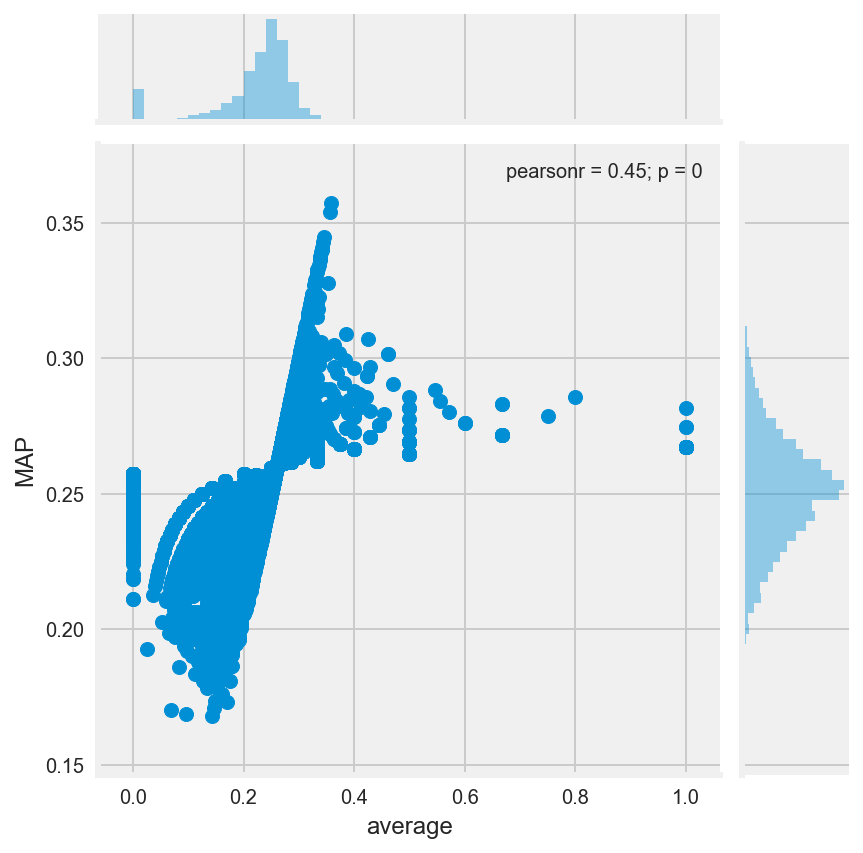

In [40]:
sns.jointplot('average', 'MAP', data=hits)